In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sweetviz
import IPython

# preprocessing
from pivottablejs import pivot_ui
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, label_binarize, RobustScaler
from scipy import interp
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

# validation
from sklearn.metrics import roc_curve, auc, confusion_matrix,  classification_report, accuracy_score, \
recall_score, precision_score, f1_score,confusion_matrix, mean_absolute_error , \
r2_score , mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# About Dataset

### Abstract

Classify fetal health in order to prevent child and maternal mortality.

### Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

If you use this dataset in your research, please credit the authors.

Citation
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 (link)

License
License was not specified at the source, yet access to the data is public and a citation was requested.

Splash banner
Photo by Aditya Romansa on Unsplash

Splash icon
Icon by Freepik[https://www.flaticon.com/authors/freepik] available on Flaticon[https://www.flaticon.com/free-icon/pregnant_781296].


# Data Ingestion & Investigation

In [2]:
data = pd.read_csv('fetal_health.csv')
data.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
493,120.0,0.009,0.091,0.002,0.000,0.0,0.000,36.0,1.8,0.0,...,53.0,177.0,6.0,0.0,163.0,152.0,160.0,42.0,1.0,1.0
1907,130.0,0.002,0.002,0.009,0.009,0.0,0.002,63.0,2.3,0.0,...,50.0,211.0,5.0,0.0,60.0,88.0,113.0,254.0,-1.0,3.0
502,130.0,0.008,0.013,0.004,0.000,0.0,0.000,36.0,1.9,0.0,...,54.0,172.0,6.0,0.0,154.0,148.0,154.0,26.0,1.0,1.0
520,126.0,0.002,0.005,0.003,0.000,0.0,0.000,40.0,1.1,4.0,...,66.0,152.0,3.0,0.0,129.0,129.0,131.0,3.0,1.0,1.0
872,136.0,0.004,0.000,0.005,0.000,0.0,0.000,42.0,0.7,22.0,...,120.0,157.0,3.0,0.0,141.0,141.0,142.0,1.0,0.0,1.0
1187,120.0,0.000,0.000,0.007,0.000,0.0,0.000,49.0,0.8,2.0,...,104.0,136.0,4.0,0.0,116.0,120.0,121.0,4.0,0.0,1.0
1581,132.0,0.001,0.000,0.005,0.004,0.0,0.000,29.0,1.5,1.0,...,61.0,153.0,4.0,1.0,133.0,129.0,134.0,23.0,1.0,1.0
542,140.0,0.001,0.000,0.001,0.000,0.0,0.000,52.0,0.8,0.0,...,57.0,165.0,7.0,0.0,146.0,145.0,147.0,4.0,1.0,1.0
1972,138.0,0.006,0.000,0.004,0.000,0.0,0.000,60.0,0.7,0.0,...,125.0,168.0,1.0,0.0,148.0,145.0,146.0,6.0,0.0,1.0
1427,144.0,0.006,0.000,0.004,0.000,0.0,0.000,39.0,1.0,5.0,...,136.0,179.0,1.0,0.0,157.0,157.0,157.0,4.0,0.0,1.0


In [3]:
pivot_ui(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

                                             |                                             | [  0%]   00:00 ->…

Report Report.html was generated.



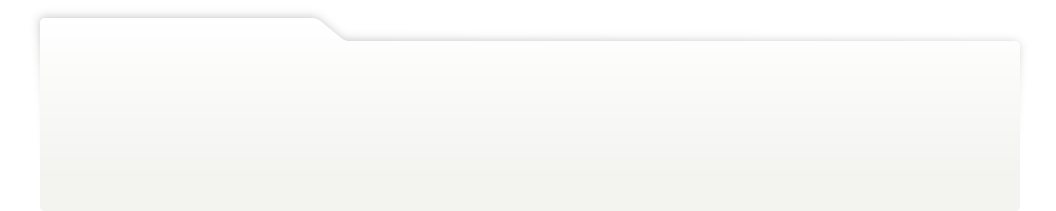
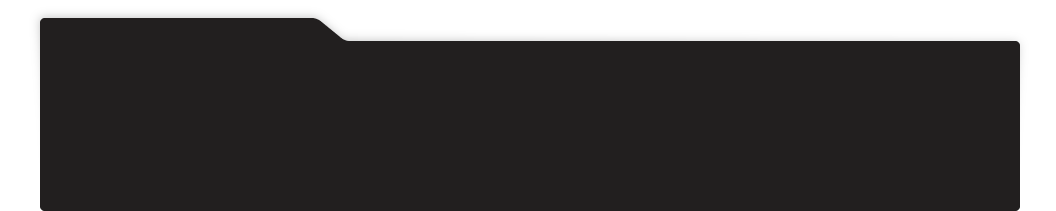
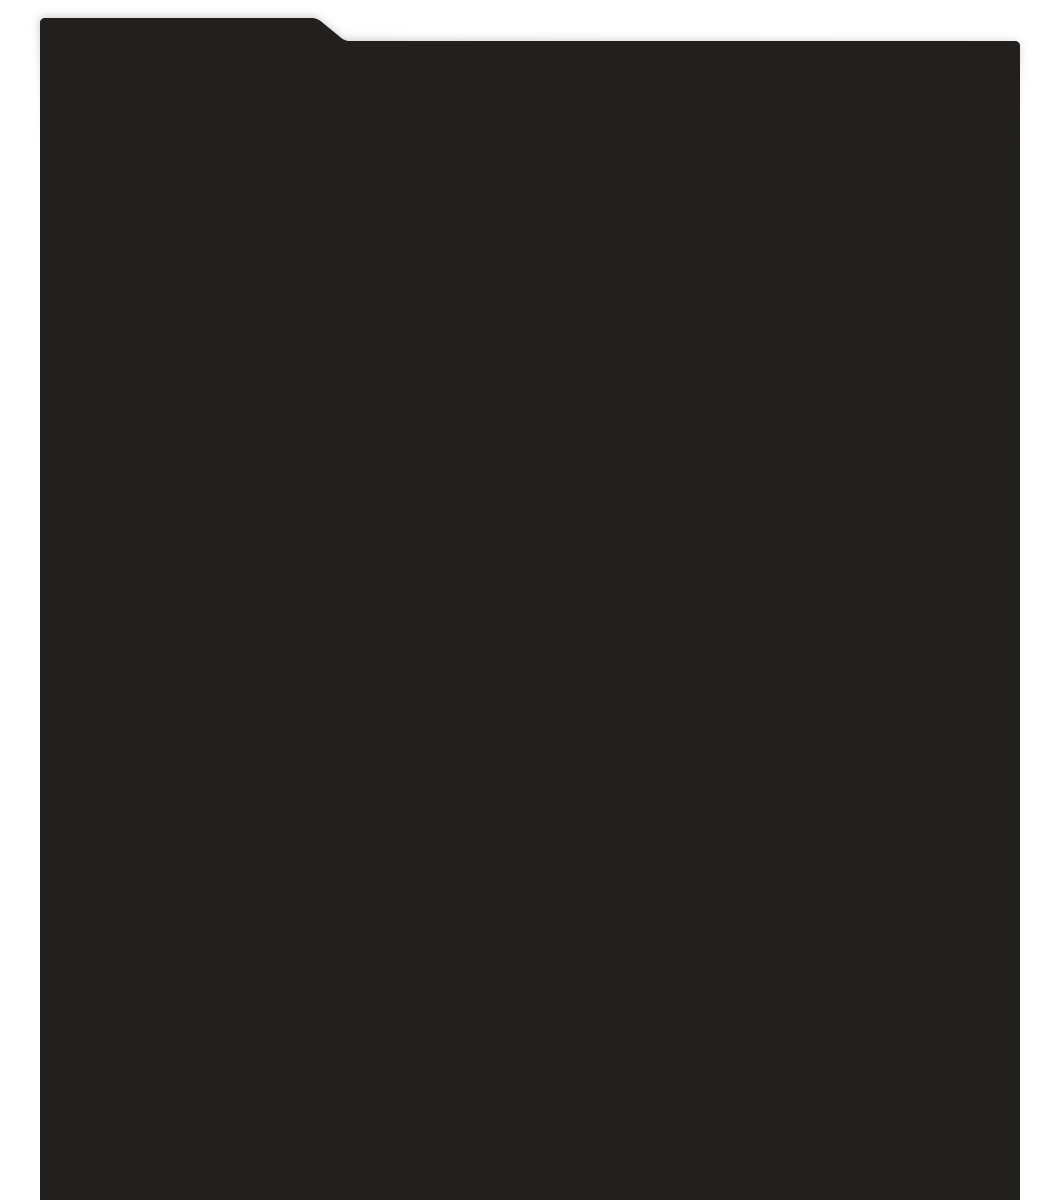
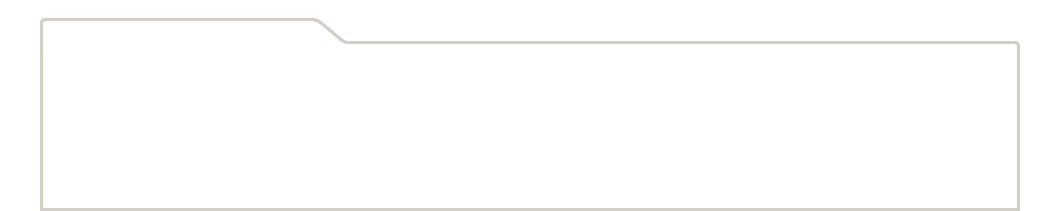
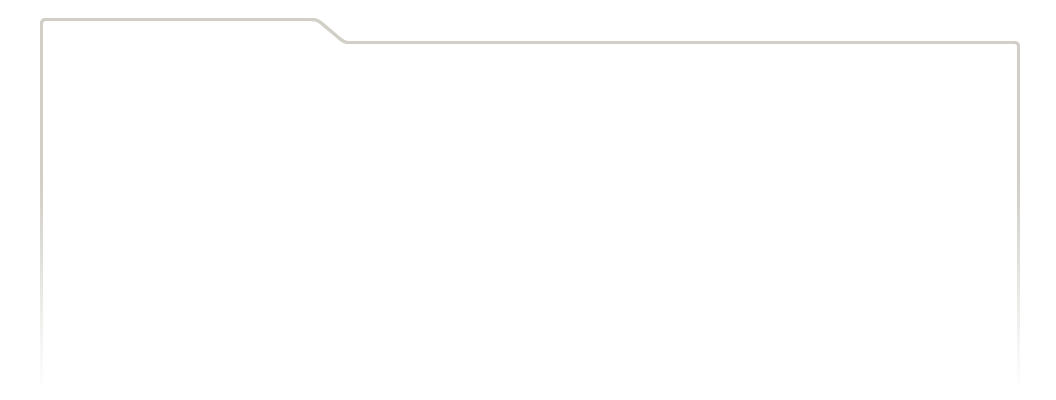
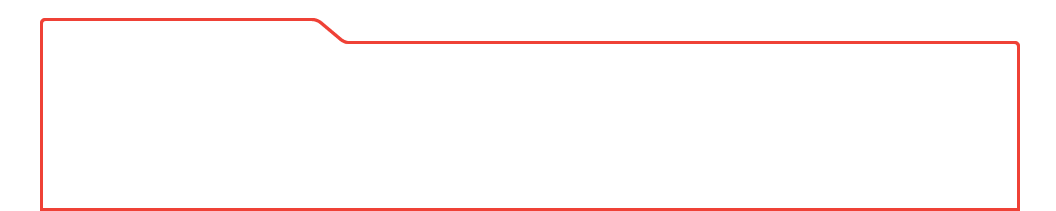
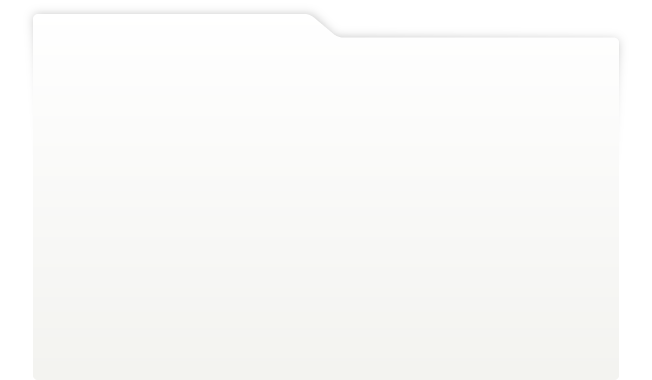
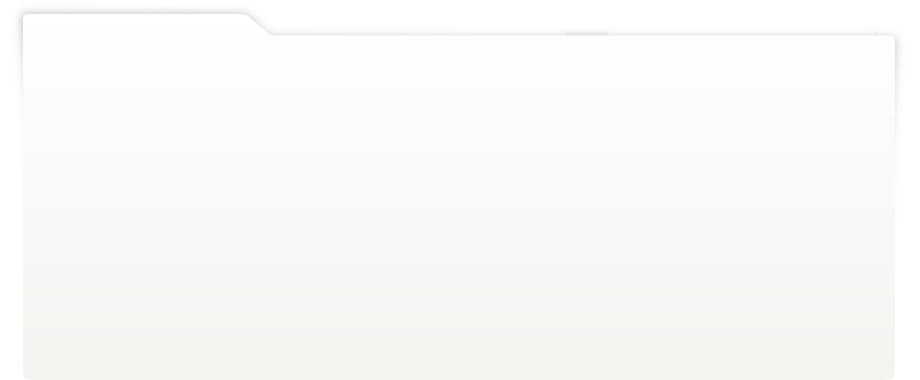
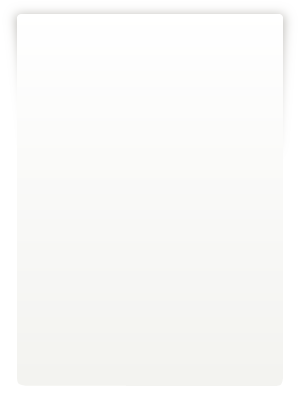
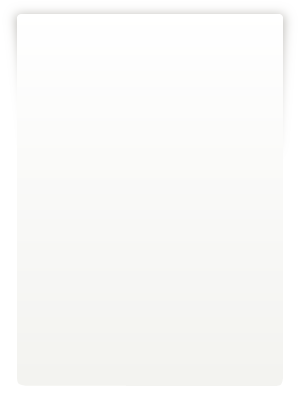
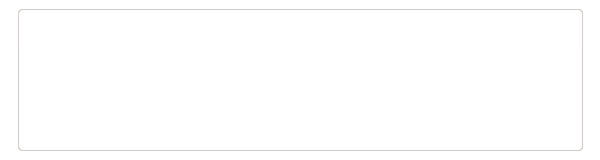
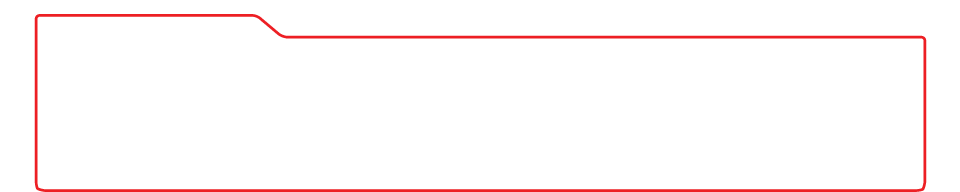
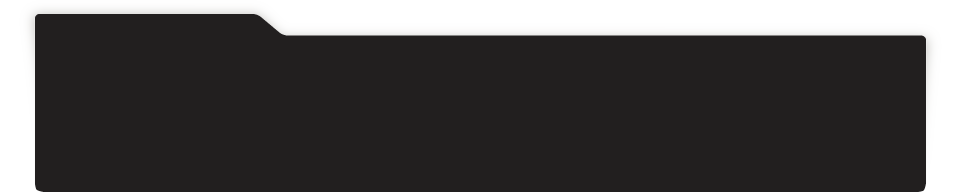
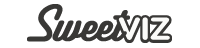
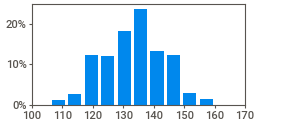
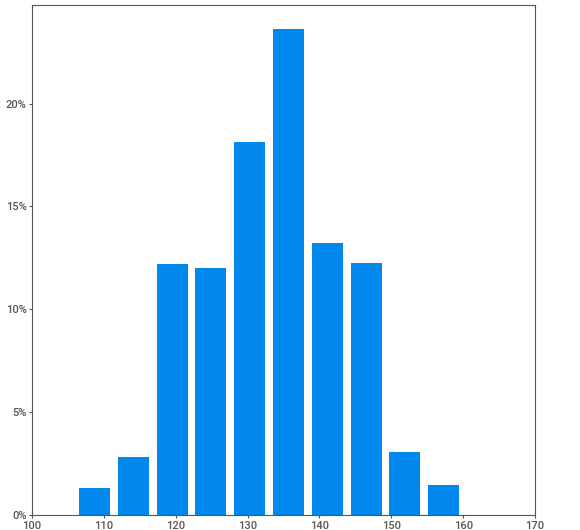
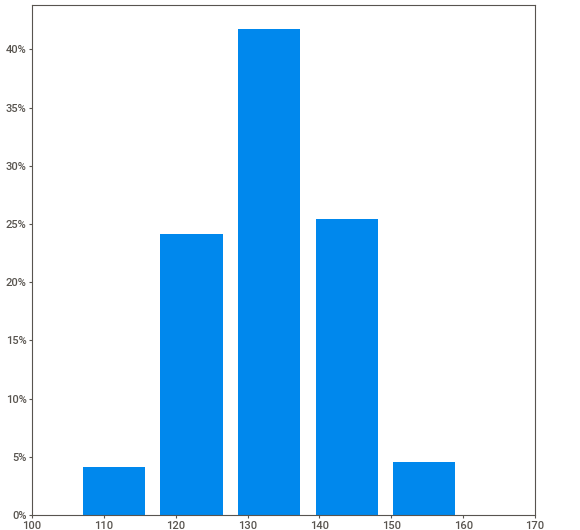
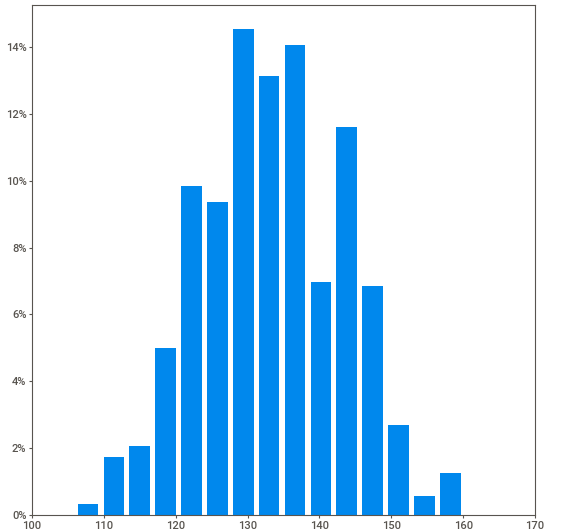
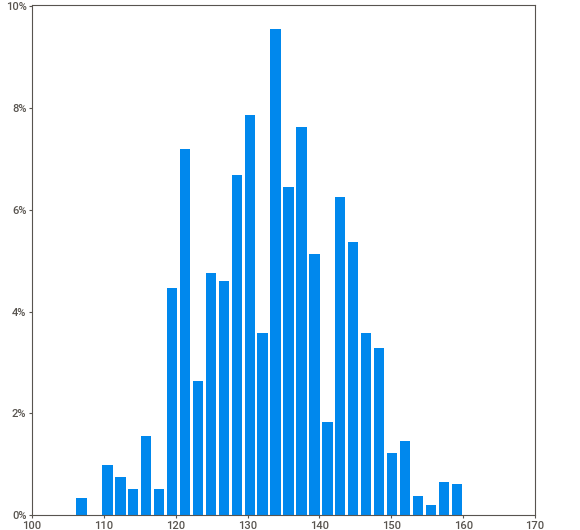
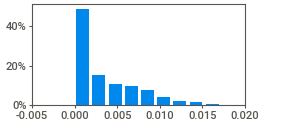
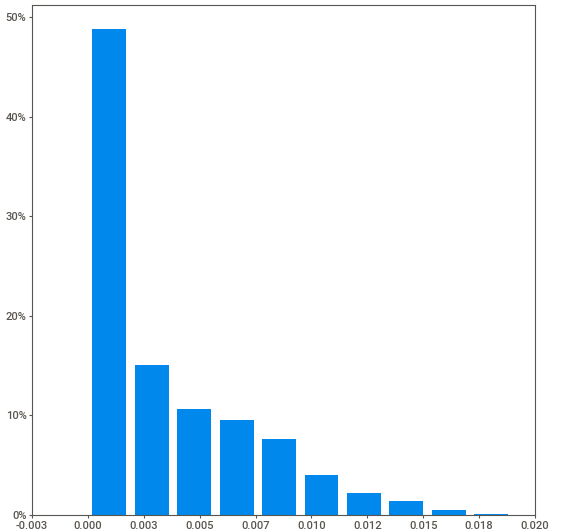
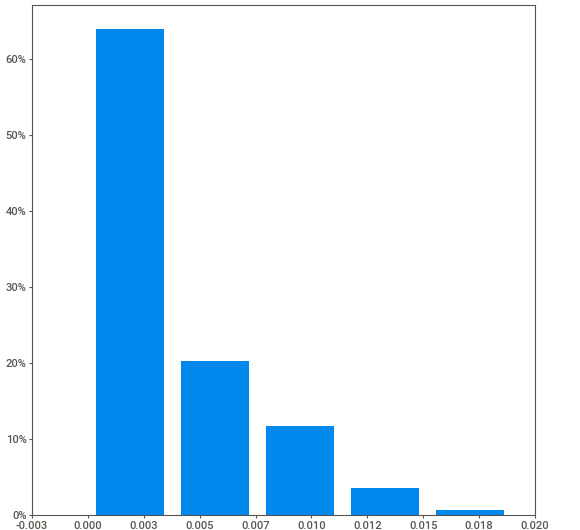
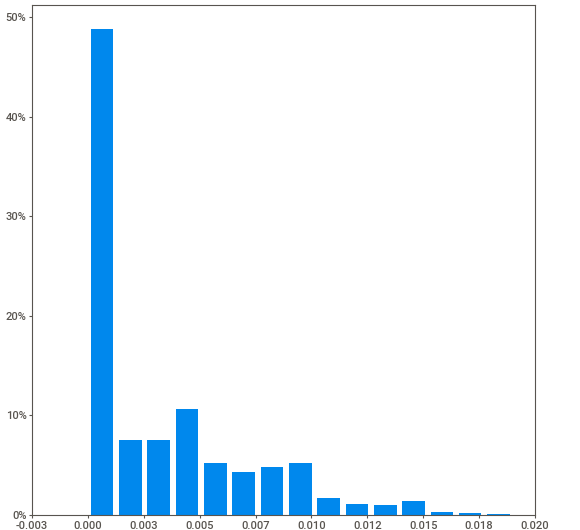
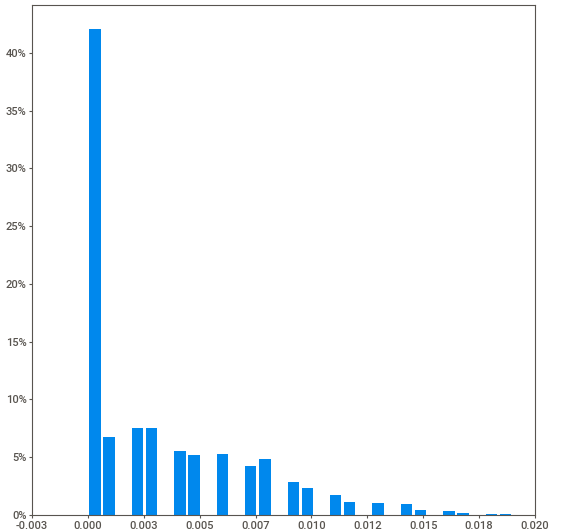
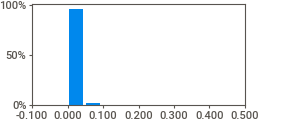
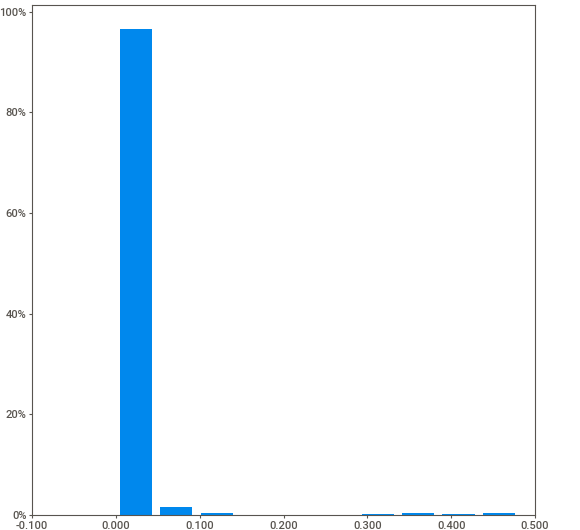
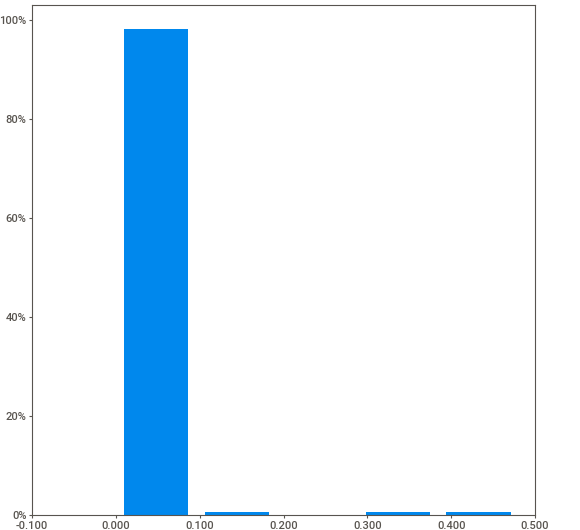
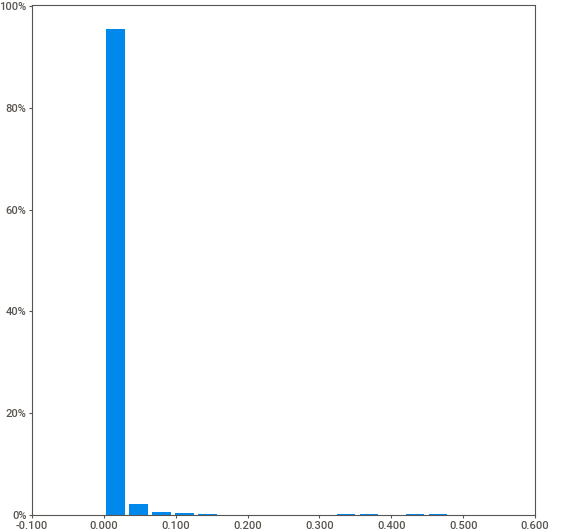
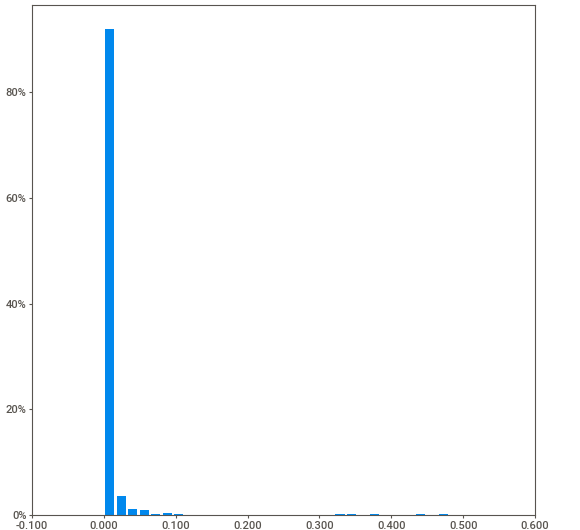
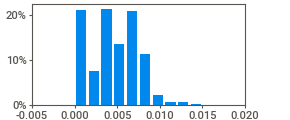
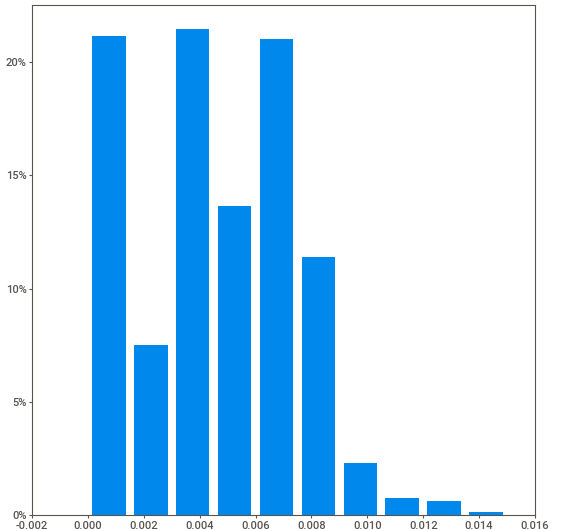
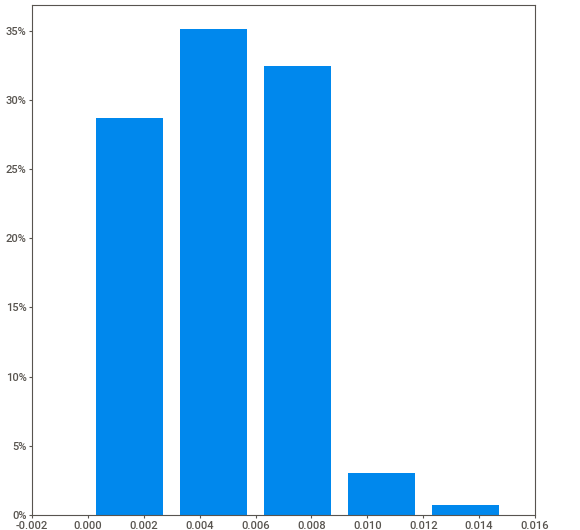
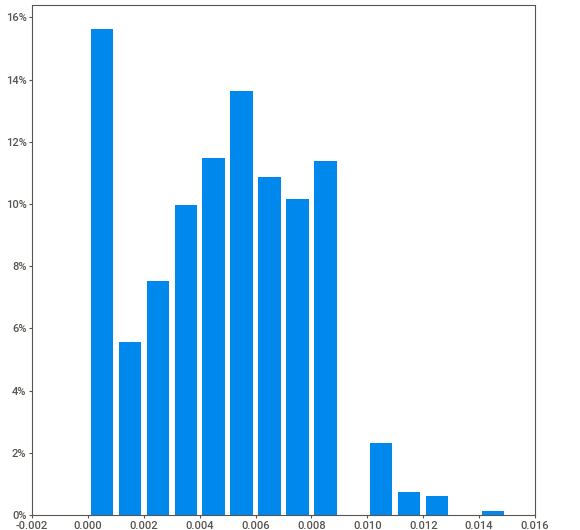
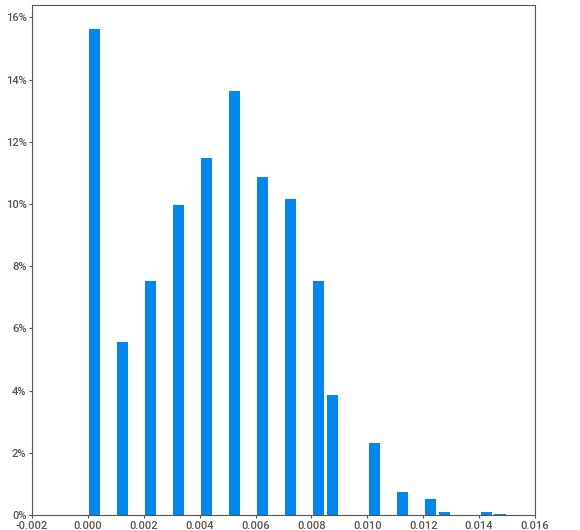
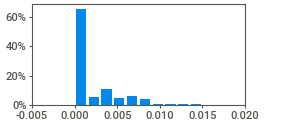
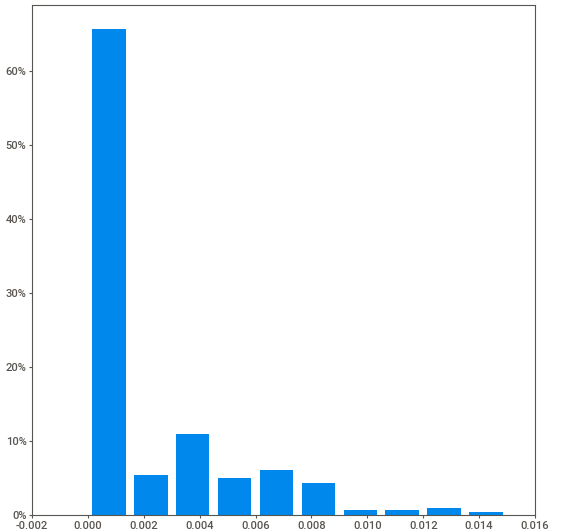
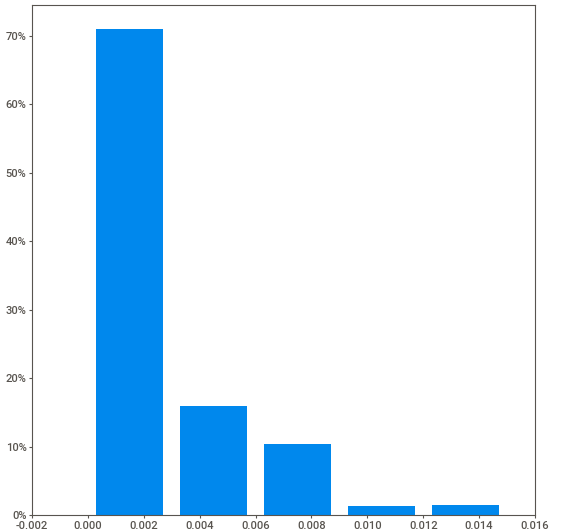
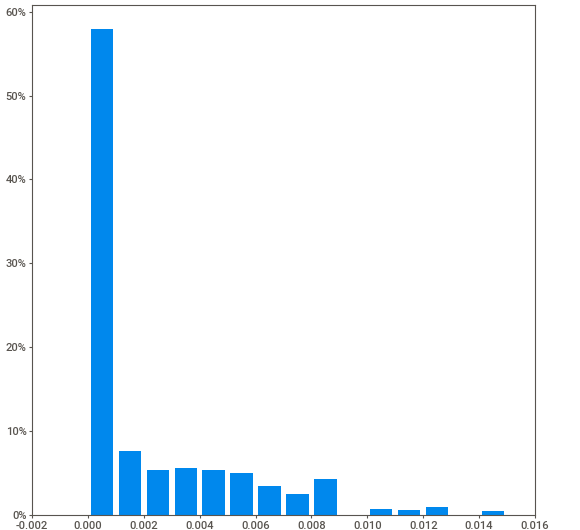
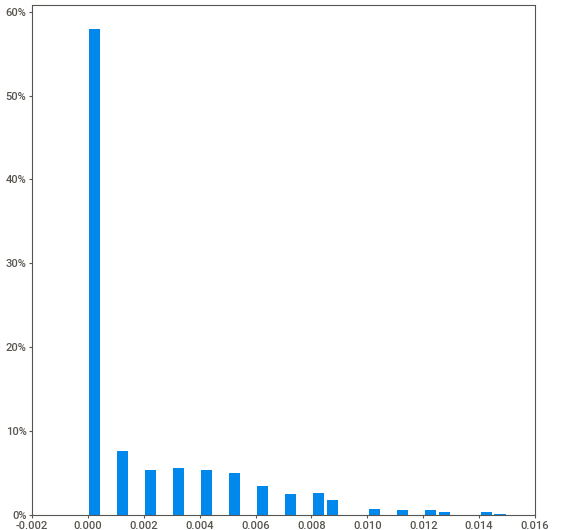
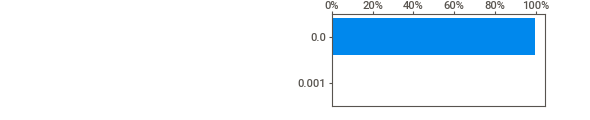
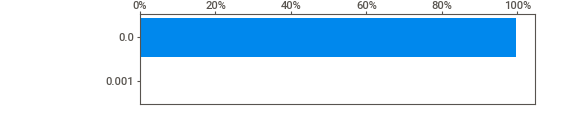
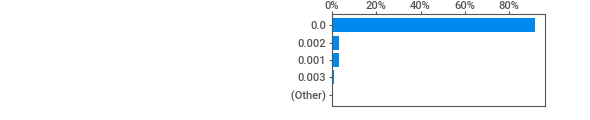
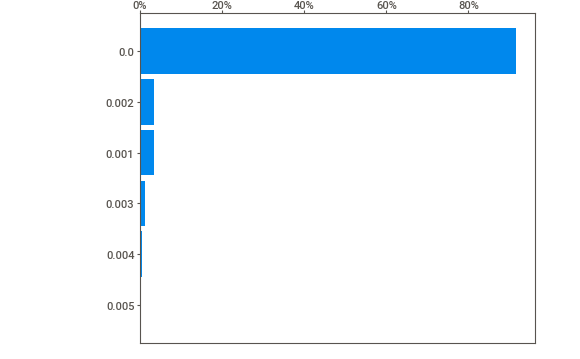
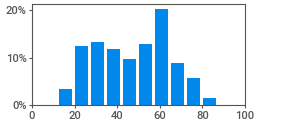
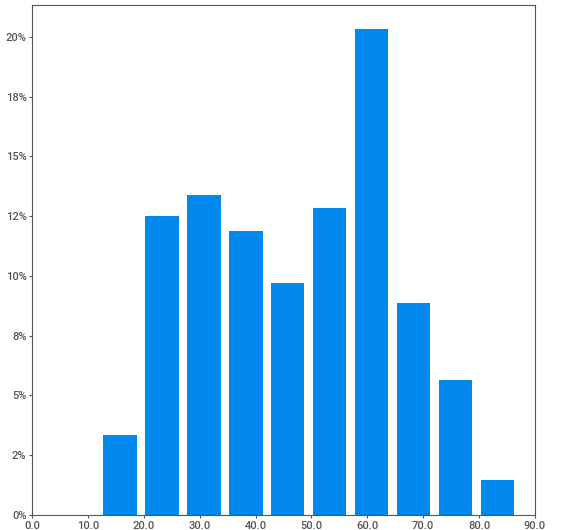
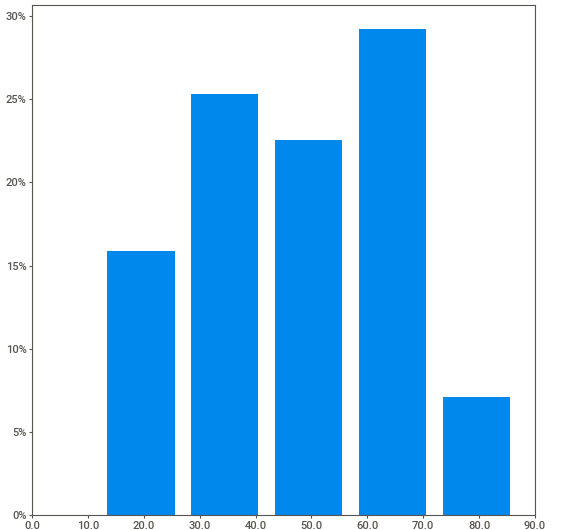
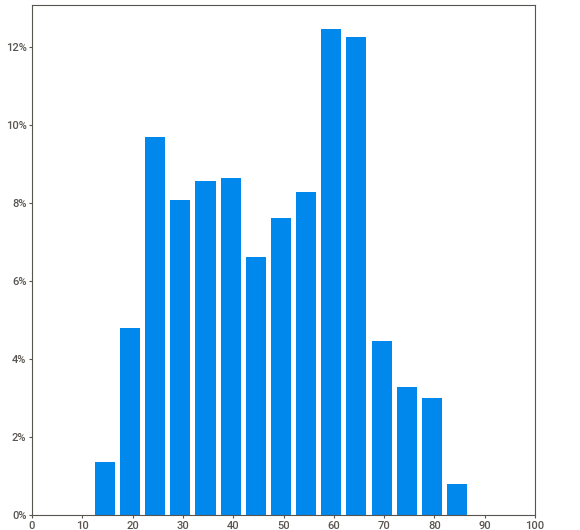
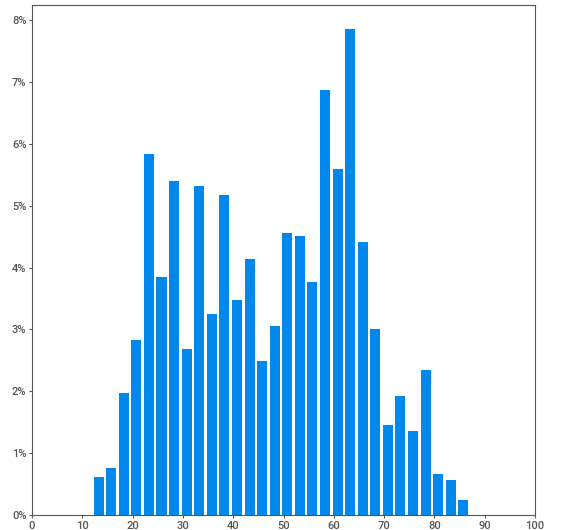
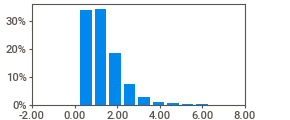
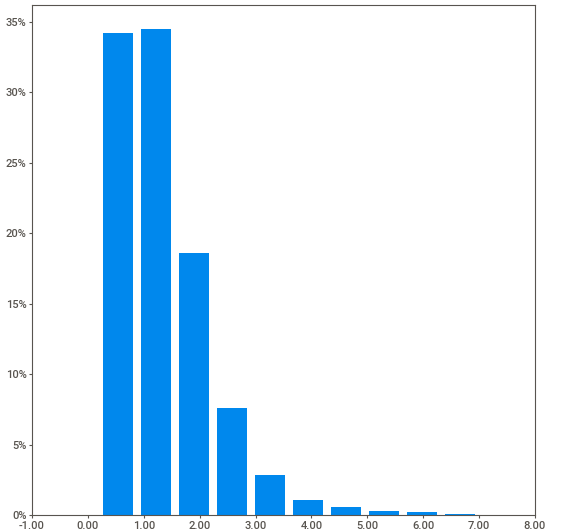
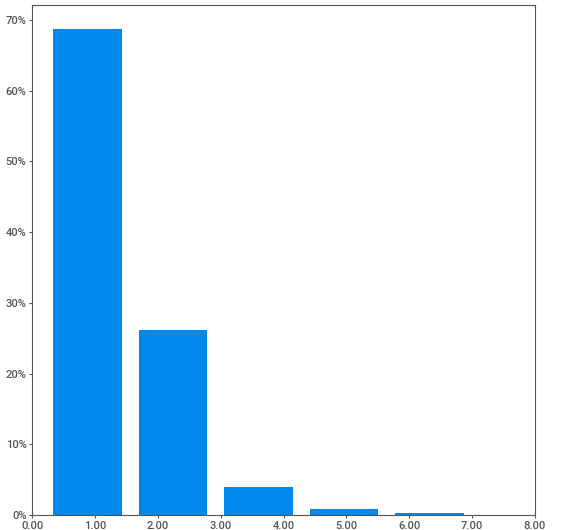
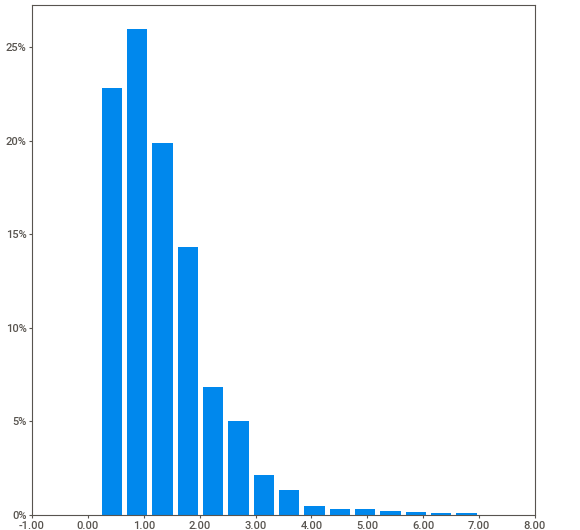
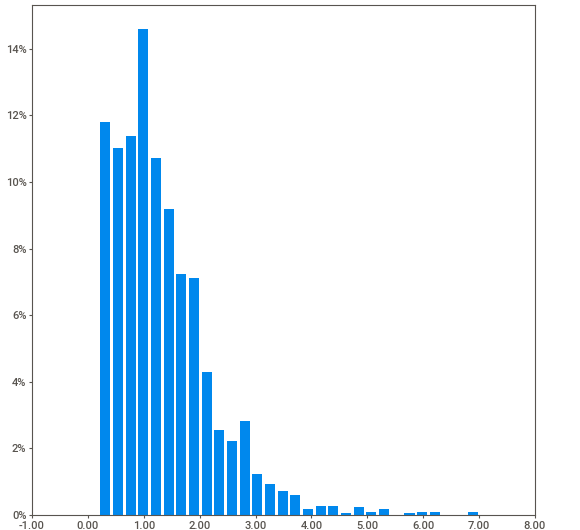
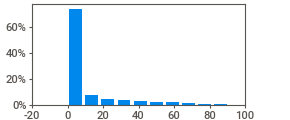
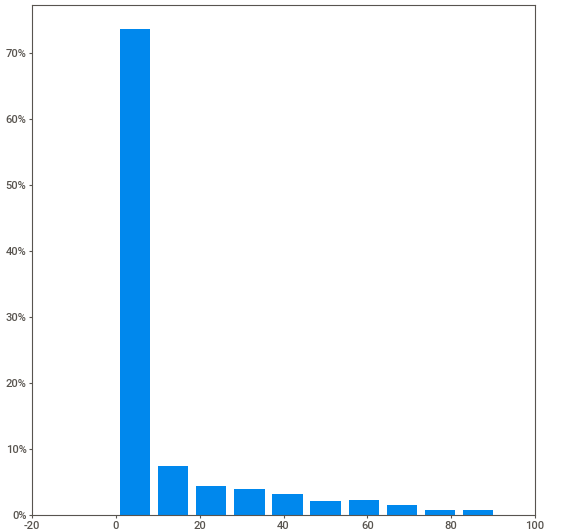
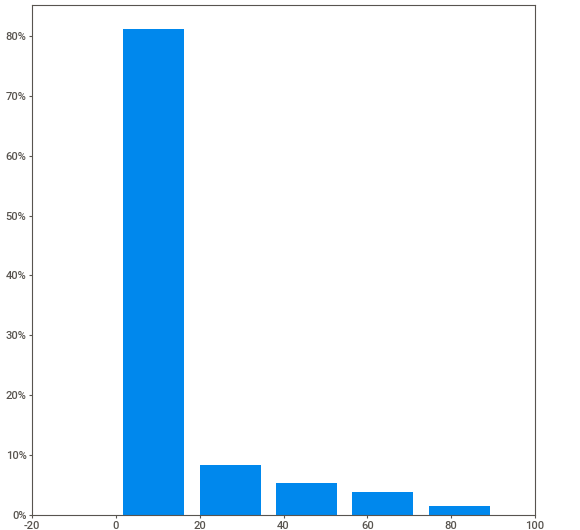
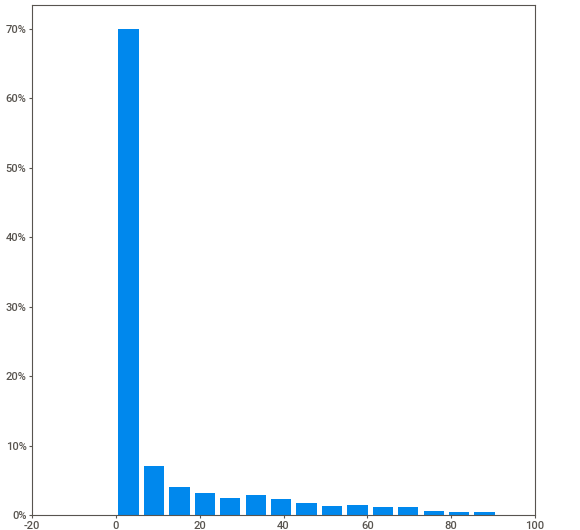
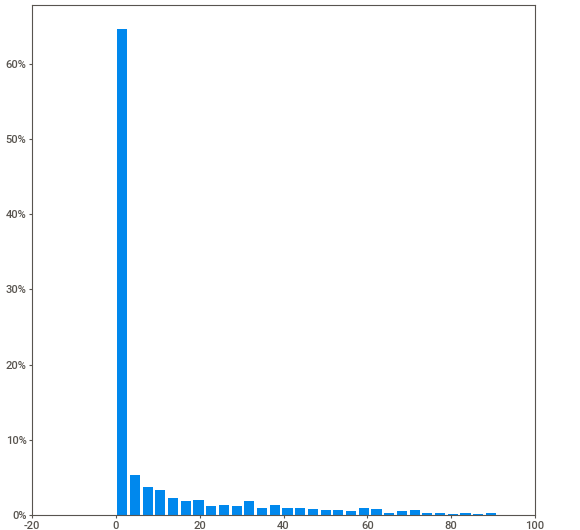
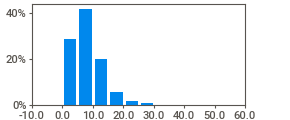
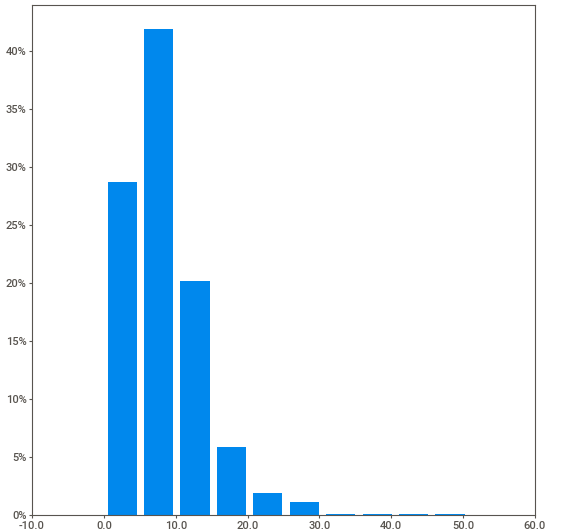
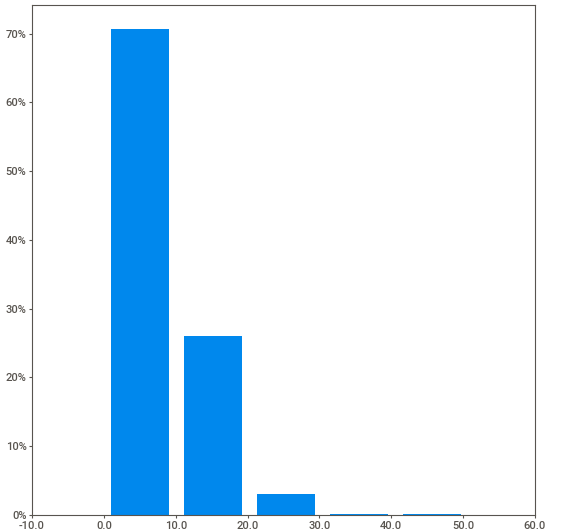
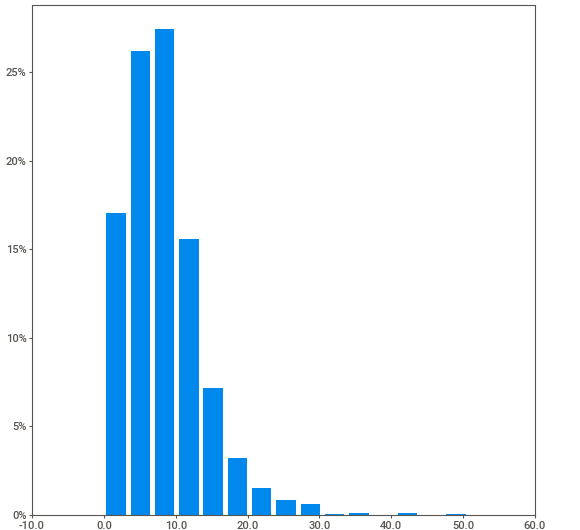
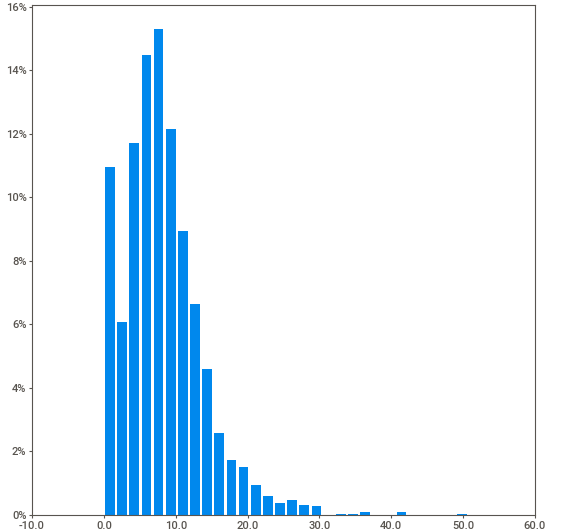
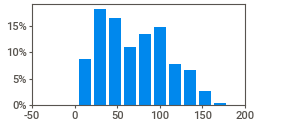
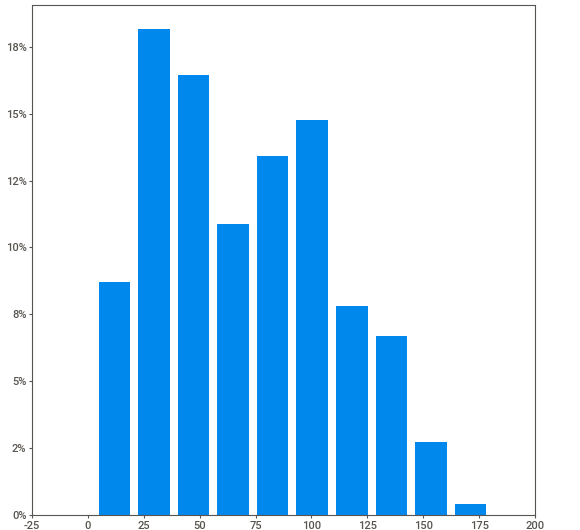
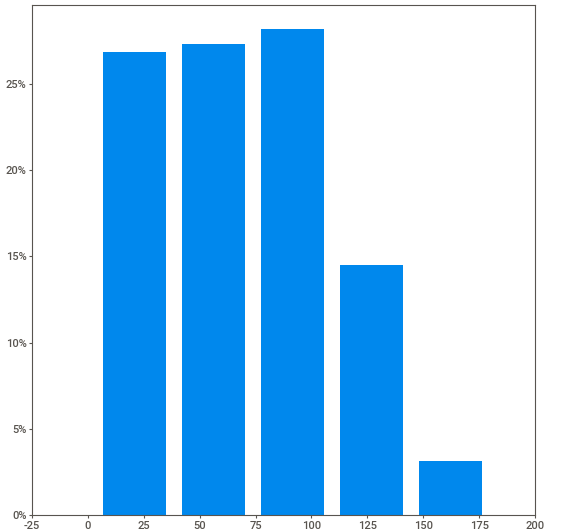
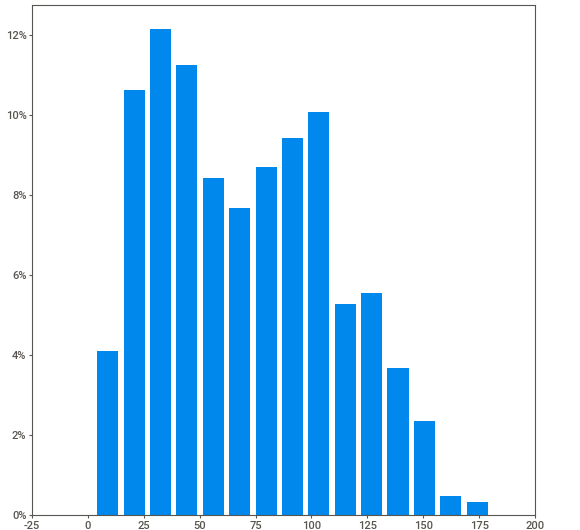
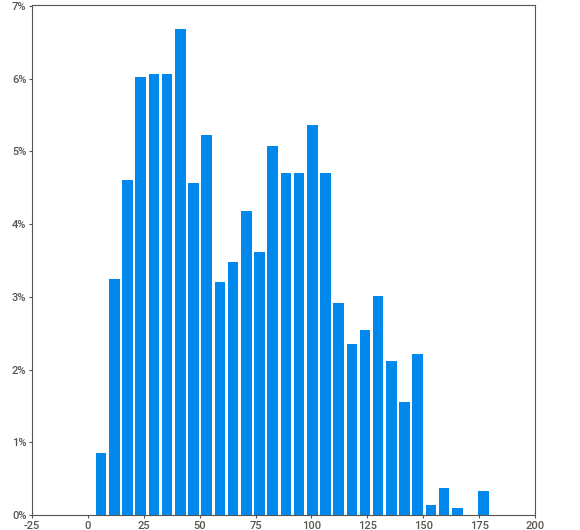
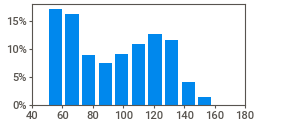
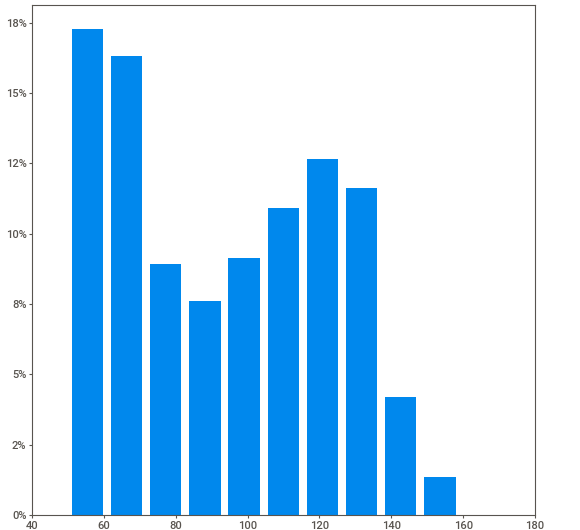
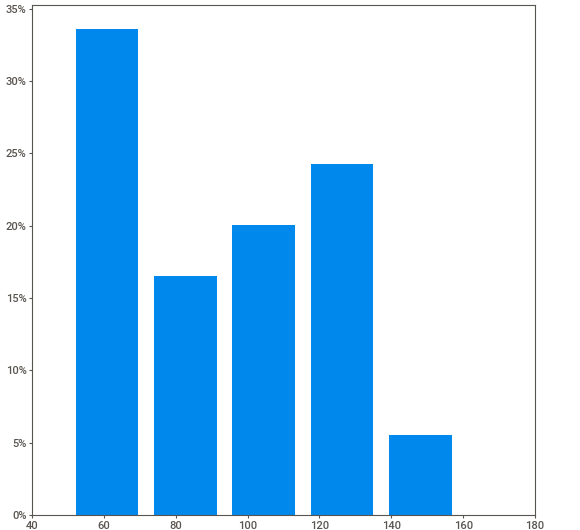
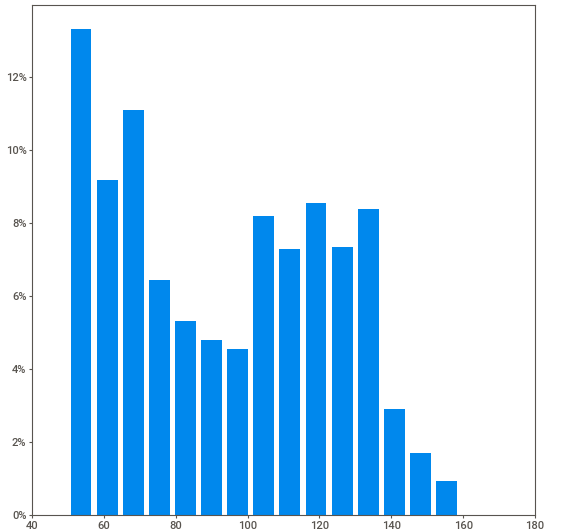
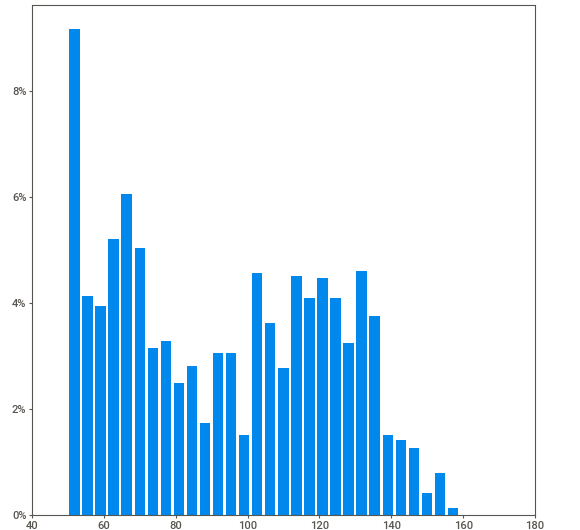
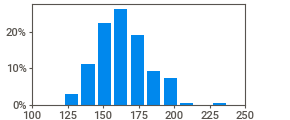
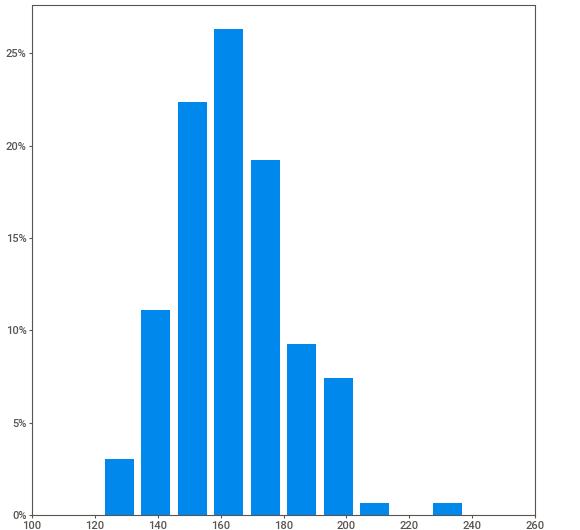
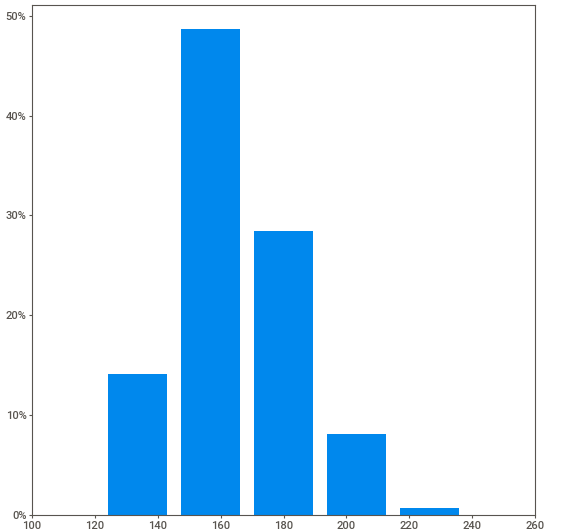
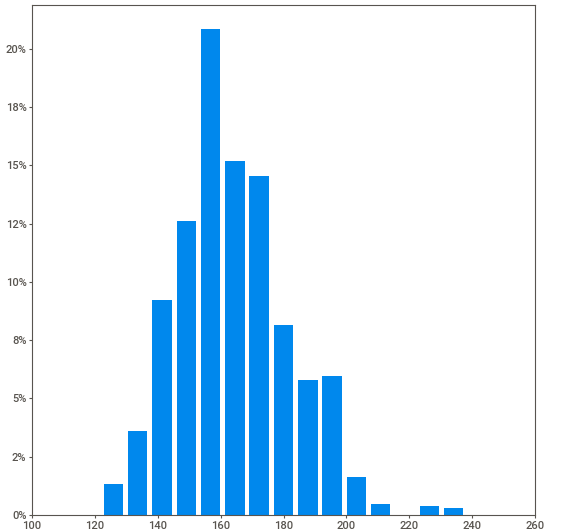
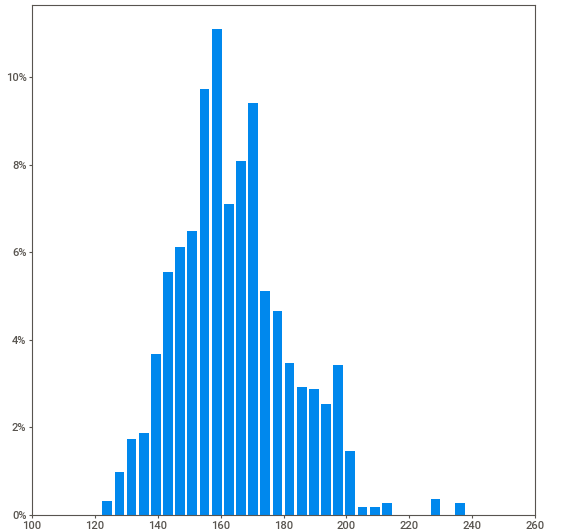
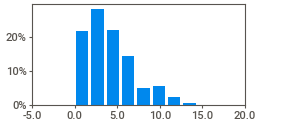
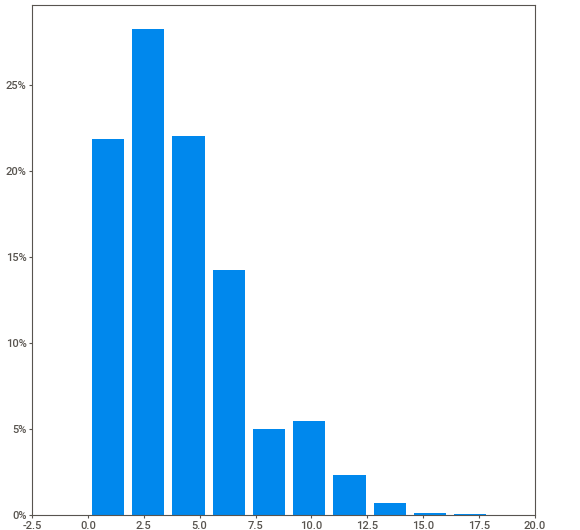
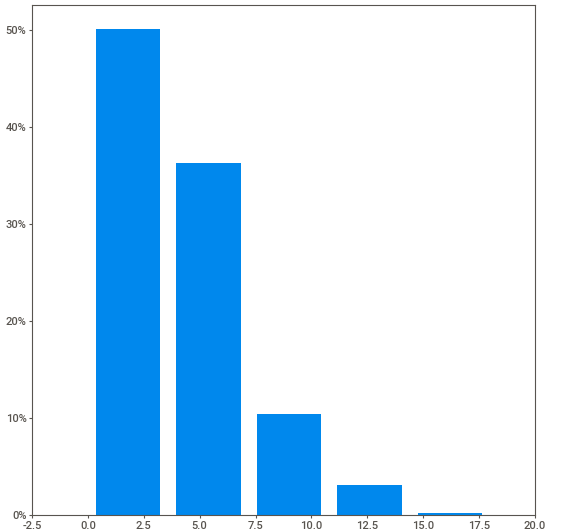
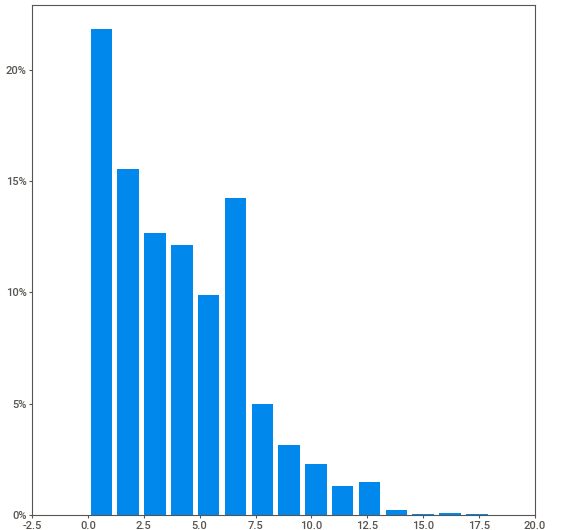
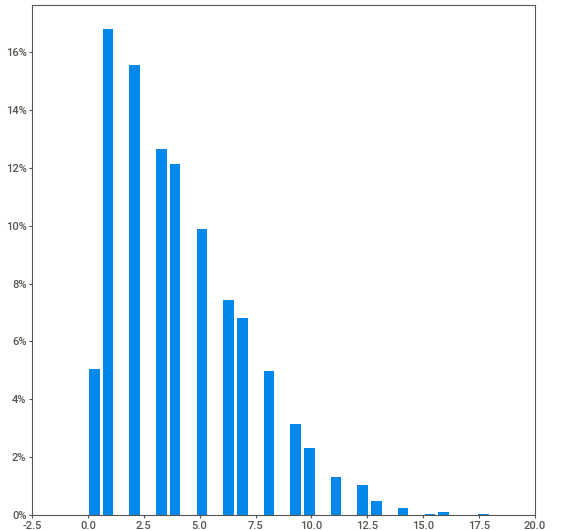
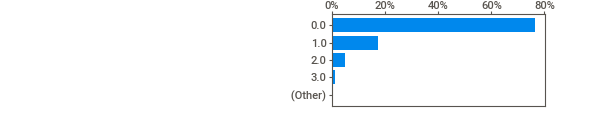
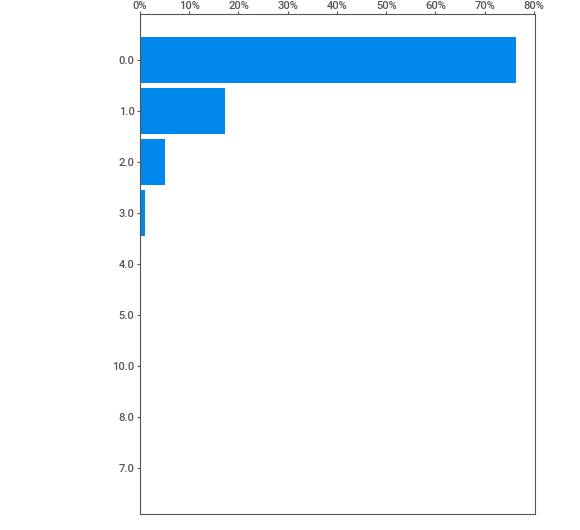
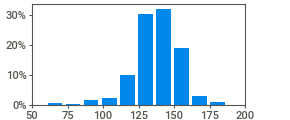
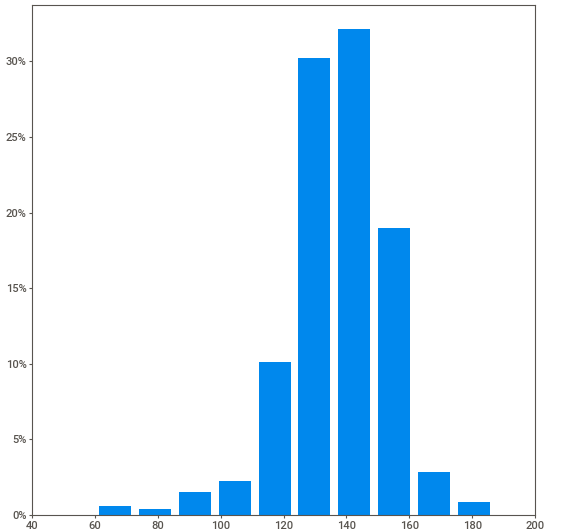
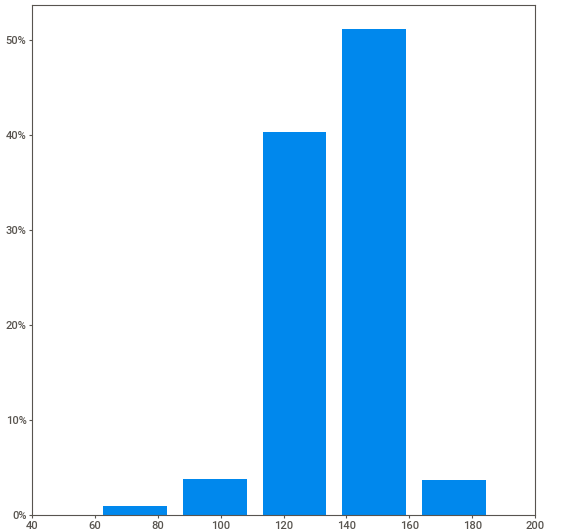
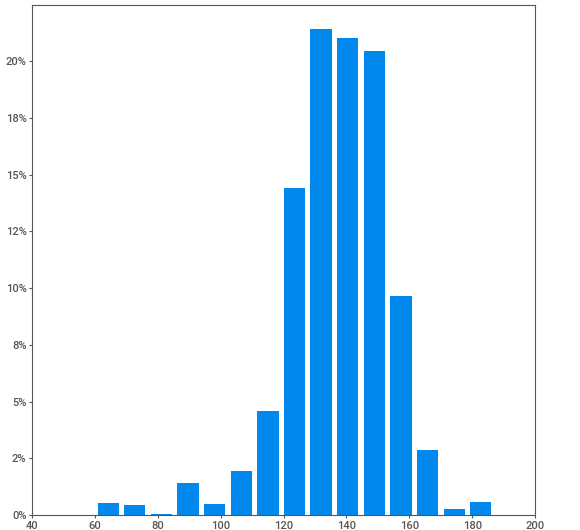
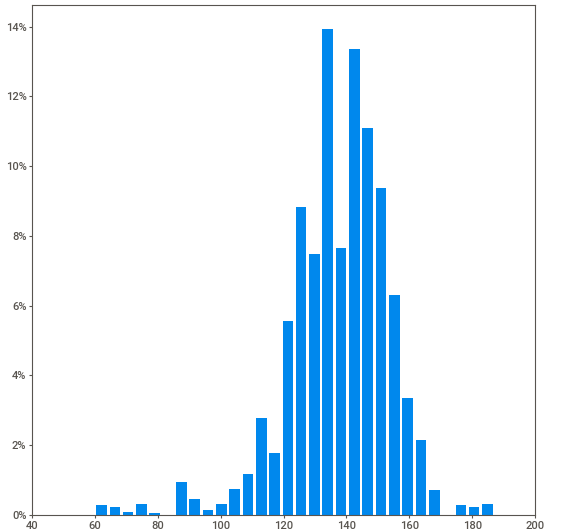
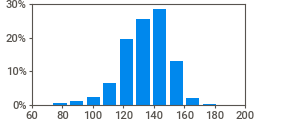
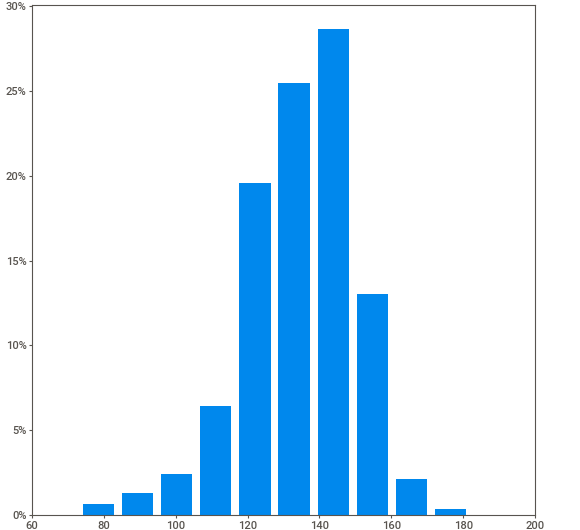
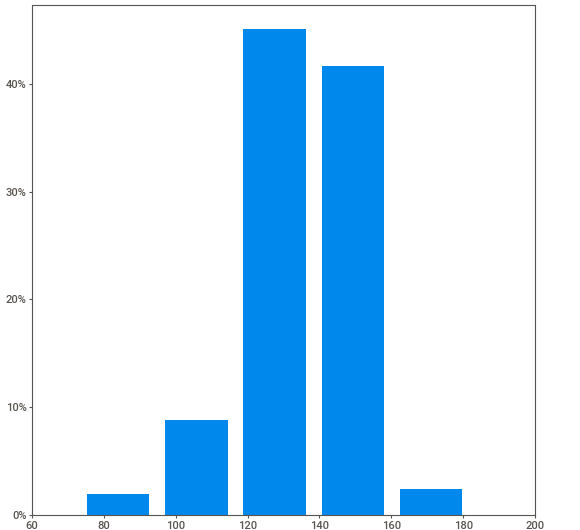
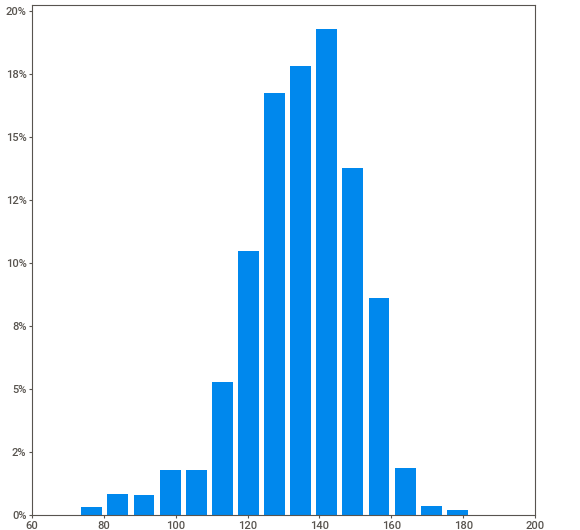
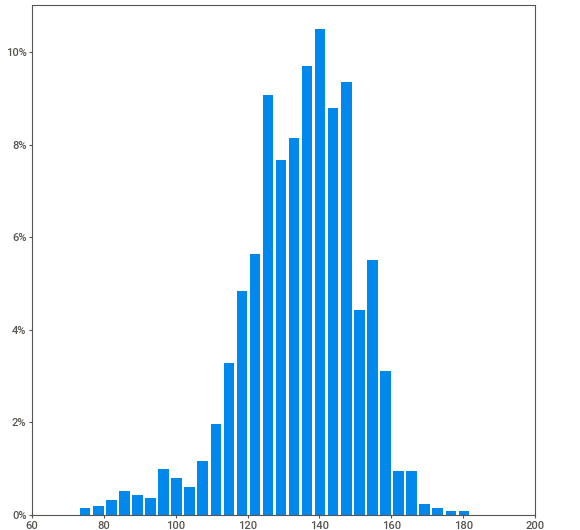
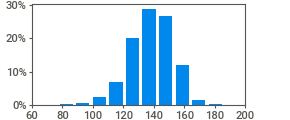
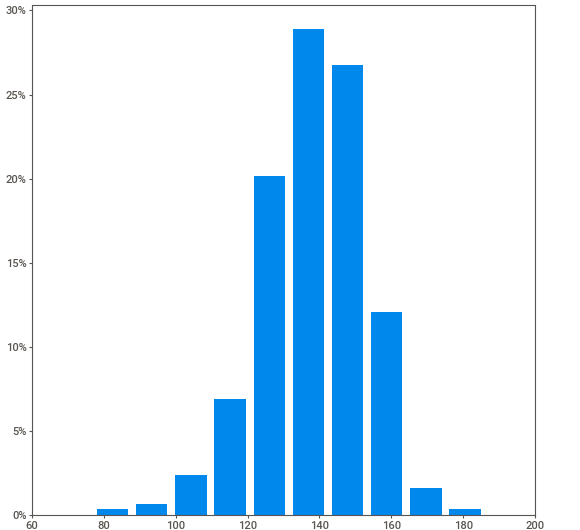
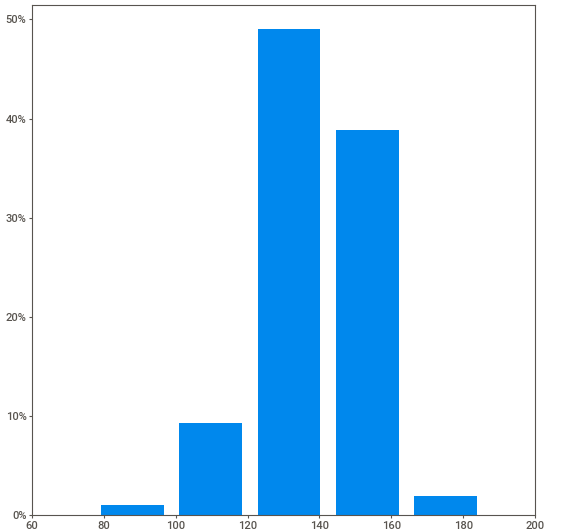
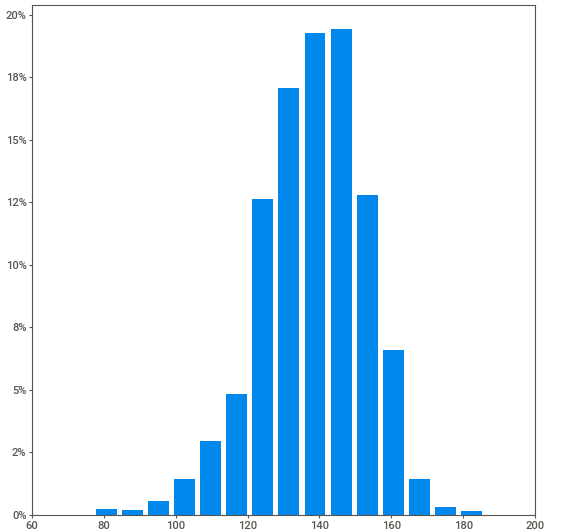
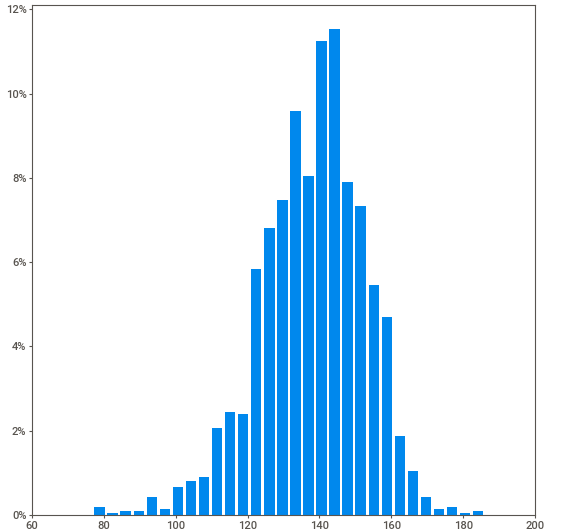
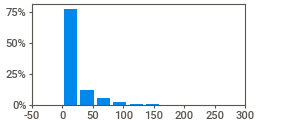
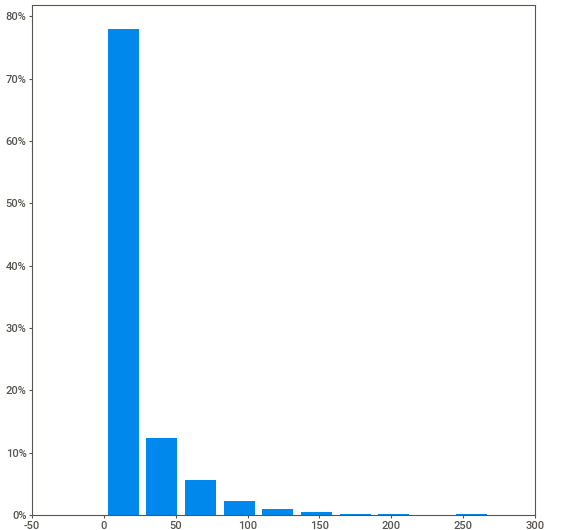
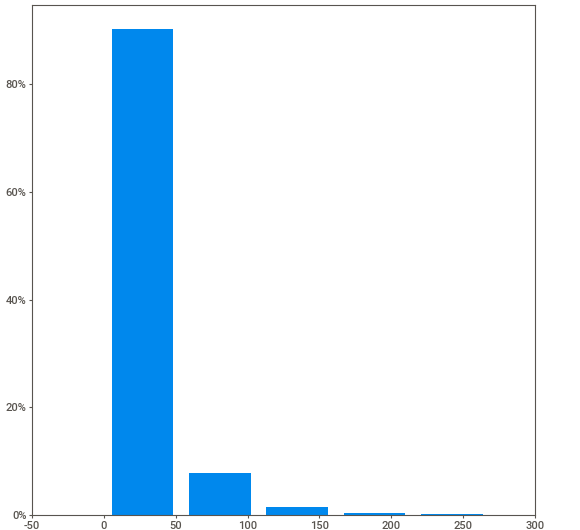
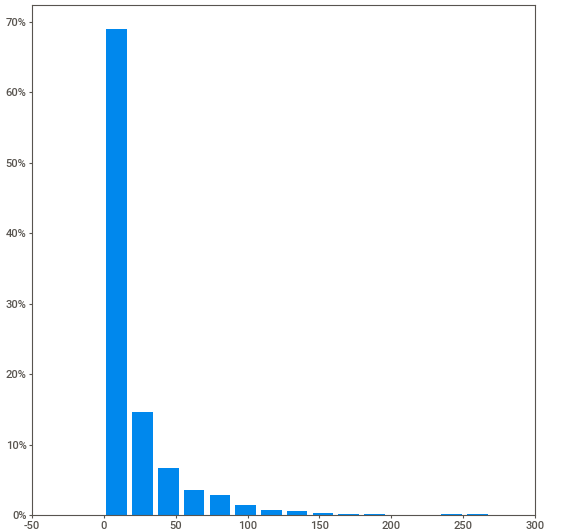
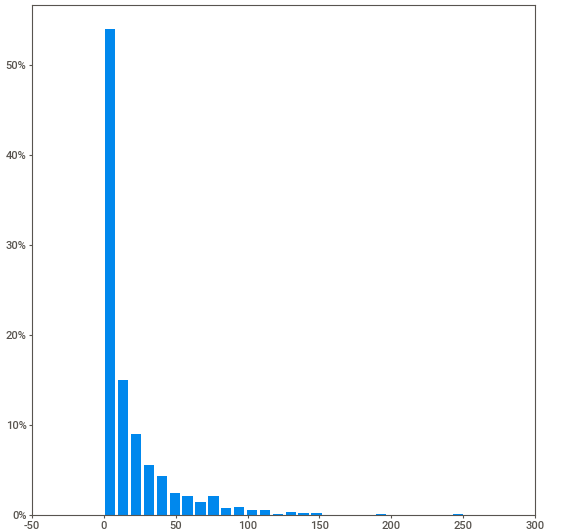
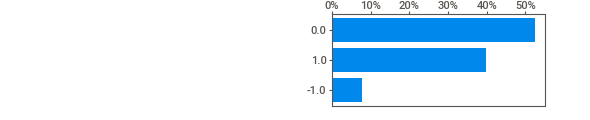
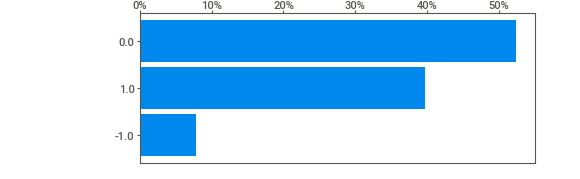
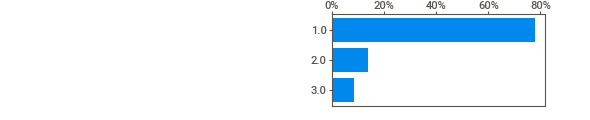
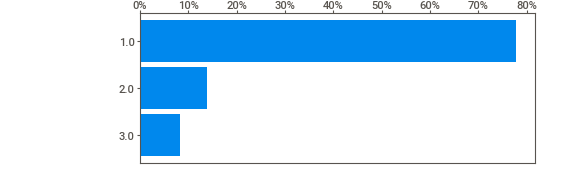
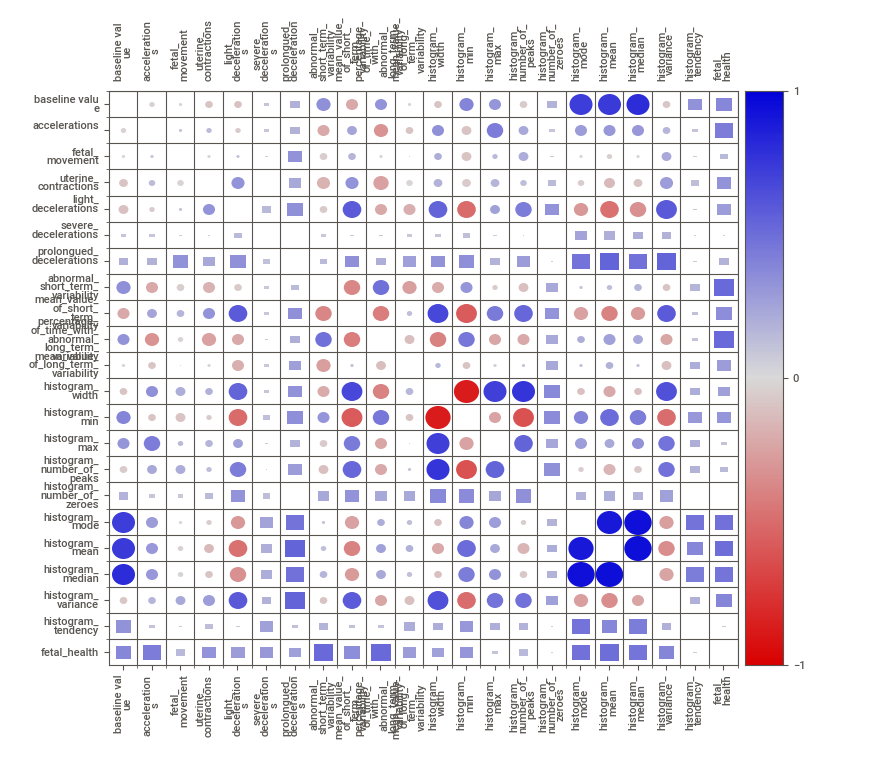
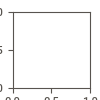

In [5]:
my_report = sweetviz.analyze([data, "All"])
my_report.show_html('Report.html', open_browser=False)
IPython.display.HTML('Report.html')

In [6]:
x = data.drop(['fetal_health'], axis=1)#.values
n_sample, n_featrues = x.shape
y = data['fetal_health']#.values

# binarize the data
# y = label_binarize(y, classes=[0,1,2])
# n_classes = y.shape[1]

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)



# Scale train/ test predictors based on training data
ro_scaler = RobustScaler().fit(x_resampled)
x_train_scaled = ro_scaler.transform(x_resampled)
x_test_scaled = ro_scaler.transform(x_test)

In [10]:
y_test.value_counts()

1.0    333
2.0     64
3.0     29
Name: fetal_health, dtype: int64

In [11]:
y_train.value_counts()

1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64

In [12]:
y_resampled.value_counts()

1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64

In [15]:
def resultsSummarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred) #.argmax(axis=1)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    sensitivity = recall_score(y_true,y_pred,average='macro')
    
    print("Condusion_matrix is:")
    print(cm)
    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))
    print(f'Sensitvity: ' + '{:.4%}'.format(sensitivity))

In [16]:
# DecisionTree
print("The DecisionTree: \n")
DT = DecisionTreeClassifier()
DT.fit(x_train_scaled, y_resampled)
print("DT_train_score:"+str(DT.score(x_train_scaled, y_resampled)))
print("DT_test_score:"+str(DT.score(x_test_scaled, y_test)))
y_pred_DT = DT.predict(x_test_scaled)
resultsSummarizer(y_test, y_pred_DT)
print(classification_report(y_test, y_pred_DT))

The DecisionTree: 

DT_train_score:1.0
DT_test_score:0.9131455399061033
Condusion_matrix is:
[[311  21   1]
 [ 12  51   1]
 [  2   0  27]]
Accuracy Score: 91.3146%
Precision Score: 86.5430%
Recall Score: 88.7281%
F_1 Score: 87.5441%
Sensitvity: 88.7281%
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.95       333
         2.0       0.71      0.80      0.75        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.91       426
   macro avg       0.87      0.89      0.88       426
weighted avg       0.92      0.91      0.91       426



In [17]:
# Random Forest 
print("The Random Forest: \n")
RF = RandomForestClassifier()
RF.fit(x_train_scaled, y_resampled)
print("RF_train_score:"+str(RF.score(x_train_scaled, y_resampled)))
print("RF_test_score:"+str(RF.score(x_test_scaled, y_test)))
y_pred_RF = RF.predict(x_test_scaled)
resultsSummarizer(y_test, y_pred_RF)
print(classification_report(y_test, y_pred_RF))

The Random Forest: 

RF_train_score:1.0
RF_test_score:0.9436619718309859
Condusion_matrix is:
[[321  11   1]
 [  8  54   2]
 [  1   1  27]]
Accuracy Score: 94.3662%
Precision Score: 89.6970%
Recall Score: 91.2916%
F_1 Score: 90.4783%
Sensitvity: 91.2916%
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       333
         2.0       0.82      0.84      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.94       426
   macro avg       0.90      0.91      0.90       426
weighted avg       0.94      0.94      0.94       426



In [21]:
# XGB Forest 
print("The XGB Forest: \n")
xgb = XGBClassifier()
idx = {1:0, 2:1, 3:2}
X_xgb = x_train_scaled.copy()
y_xgb = y_resampled.map(idx)
X_test_xgb = x_test_scaled.copy()
y_test_xgb = y_test.map(idx)
xgb.fit(X_xgb, y_xgb)
print("XGB_train_score:"+str(xgb.score(X_xgb, y_xgb)))
print("XGB_test_score:"+str(xgb.score(X_test_xgb, y_test_xgb)))
y_pred_XGB = xgb.predict(X_test_xgb)
resultsSummarizer(y_test_xgb, y_pred_XGB)
print(classification_report(y_test_xgb, y_pred_XGB))

The XGB Forest: 

XGB_train_score:1.0
XGB_test_score:0.9577464788732394
Condusion_matrix is:
[[323   9   1]
 [  8  56   0]
 [  0   0  29]]
Accuracy Score: 95.7746%
Precision Score: 93.4679%
Recall Score: 94.8323%
F_1 Score: 94.1386%
Sensitvity: 94.8323%
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       333
           1       0.86      0.88      0.87        64
           2       0.97      1.00      0.98        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426



In [19]:
# KNN 
print("The KNN: \n")
knn = KNeighborsClassifier(4)
knn.fit(x_train_scaled, y_resampled)
print("KNN_train_score:"+str(knn.score(x_train_scaled, y_resampled)))
print("KNN_test_score:"+str(knn.score(x_test_scaled, y_test)))
y_pred_KNN = knn.predict(x_test_scaled)
resultsSummarizer(y_test, y_pred_KNN)
print(classification_report(y_test, y_pred_KNN))

The KNN: 

KNN_train_score:0.9858799798285426
KNN_test_score:0.9084507042253521
Condusion_matrix is:
[[305  24   4]
 [  5  56   3]
 [  1   2  26]]
Accuracy Score: 90.8451%
Precision Score: 81.7171%
Recall Score: 89.5823%
F_1 Score: 85.1013%
Sensitvity: 89.5823%
              precision    recall  f1-score   support

         1.0       0.98      0.92      0.95       333
         2.0       0.68      0.88      0.77        64
         3.0       0.79      0.90      0.84        29

    accuracy                           0.91       426
   macro avg       0.82      0.90      0.85       426
weighted avg       0.92      0.91      0.91       426

